In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = {
    'Area': [800, 1000, 1200, 1500, 1800, 2000, 2200],
    'BHK': [1, 2, 2, 3, 3, 4, 4],
    'Bathroom': [1, 2, 2, 3, 3, 4, 4],
    'Furnishing': [0, 1, 1, 1, 0, 1, 0],  # 0 = Unfurnished, 1 = Furnished
    'Price': [3000000, 4500000, 5000000, 6500000, 7000000, 8500000, 9000000]
}

df = pd.DataFrame(data)
df


,Area,BHK,Bathroom,Furnishing,Price
0,800,1,1,0,3000000
1,1000,2,2,1,4500000
2,1200,2,2,1,5000000
3,1500,3,3,1,6500000
4,1800,3,3,0,7000000
5,2000,4,4,1,8500000
6,2200,4,4,0,9000000


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Area        7 non-null      int64
 1   BHK         7 non-null      int64
 2   Bathroom    7 non-null      int64
 3   Furnishing  7 non-null      int64
 4   Price       7 non-null      int64
dtypes: int64(5)
memory usage: 412.0 bytes


,Area,BHK,Bathroom,Furnishing,Price
count,7.000000,7.000000,7.000000,7.000000,7.000000e+00
mean,1500.000000,2.714286,2.714286,0.571429,6.214286e+06
std,525.991128,1.112697,1.112697,0.534522,2.176717e+06
min,800.000000,1.000000,1.000000,0.000000,3.000000e+06
25%,1100.000000,2.000000,2.000000,0.000000,4.750000e+06
50%,1500.000000,3.000000,3.000000,1.000000,6.500000e+06
75%,1900.000000,3.500000,3.500000,1.000000,7.750000e+06
max,2200.000000,4.000000,4.000000,1.000000,9.000000e+06


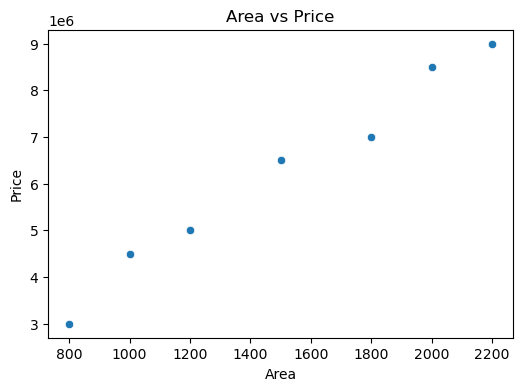

In [4]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title("Area vs Price")
plt.show()


In [5]:
X = df[['Area', 'BHK', 'Bathroom', 'Furnishing']]
y = df['Price']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 25000.00000206544
Mean Squared Error (MSE): 1250000000.0909903
Root Mean Squared Error (RMSE): 35355.33906061418
R2 Score: 0.997777777777616


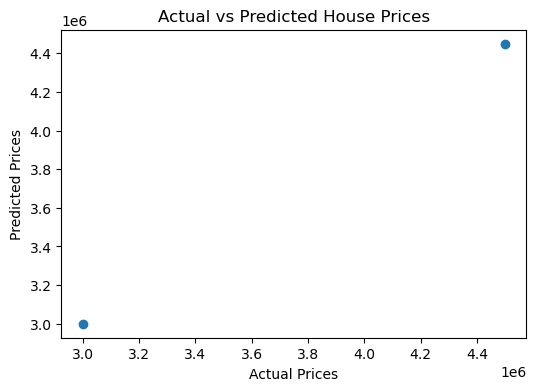

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [12]:
## Create input as DataFrame with SAME column names
new_house = pd.DataFrame(
    [[1600, 3, 3, 1]],
    columns=['Area', 'BHK', 'Bathroom', 'Furnishing']
)

predicted_price = model.predict(new_house)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 6749999.999999655


In [13]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

feature_importance


,Feature,Coefficient
0,Area,2500.0
1,BHK,400000.0
2,Bathroom,400000.0
3,Furnishing,150000.0


In [14]:
import pickle

with open("house_price_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [15]:
with open("house_price_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

loaded_model.predict(new_house)


array([6749999.99999966])

# House Price Prediction Using Machine Learning


## Objective
The objective of this project is to predict house prices based on important features such as area, number of bedrooms (BHK), bathrooms, and furnishing status using a machine learning regression model.


## Problem Statement
Estimating house prices manually is difficult and time-consuming. This project uses machine learning techniques to automate the prediction of house prices based on historical data.


## Tools & Technologies Used
- Python
- Pandas
- NumPy
- Scikit-Learn
- Matplotlib
- Seaborn
- Jupyter Notebook


## Project Workflow
1. Data collection
2. Data preprocessing
3. Exploratory data analysis
4. Model building using Linear Regression
5. Model evaluation
6. House price prediction


## Conclusion
The House Price Prediction model was successfully built using Linear Regression. The model predicts house prices effectively based on input features and demonstrates a complete machine learning workflow suitable for real-world applications.


## Model Evaluation
The model performance was evaluated using the following metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R² Score

These metrics help in understanding the accuracy and reliability of the prediction model.


In [17]:
import pickle

with open("house_price_prediction_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [18]:
with open("house_price_prediction_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

loaded_model.predict(new_house)


array([6749999.99999966])

## Final Conclusion
This project successfully demonstrates the use of machine learning techniques to predict house prices. 
Linear Regression was used to build the model, and the results show that house prices can be predicted effectively based on given features.
